In [2]:
!pip install yfinance

In [3]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('/content/crypto_data_updated_13_november.csv')

In [6]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [7]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [8]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-04-22 00:00:00+00:00,5399.365234,14601631648,171.874664,6094878077,1.006089,12392918470,23.908110,254544860
2019-04-23 00:00:00+00:00,5572.362305,15867308108,171.447800,7097827092,1.008323,13668552021,22.876261,264898474
2019-04-24 00:00:00+00:00,5464.866699,17048033399,165.826096,7351304156,1.005564,15689022306,23.129068,259839247
2019-04-25 00:00:00+00:00,5210.515625,15330283408,154.459396,6820332362,0.992808,13786916955,22.243107,244068802
2019-04-26 00:00:00+00:00,5279.348145,16812108040,156.347092,7505283355,0.991103,15229200868,22.869429,253113255


In [9]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2024-04-18 00:00:00+00:00,63512.753906,36006307335,3066.027588,15183777035,1.000551,63558115213,552.172119,1439312699
2024-04-19 00:00:00+00:00,63843.570312,49920425401,3059.278564,20399982867,1.000595,84354523666,554.889282,1320094794
2024-04-20 00:00:00+00:00,64994.441406,23097485495,3157.627197,9918642130,1.000429,45625971025,570.960510,697007137
2024-04-21 00:00:00+00:00,64926.644531,20506644853,3147.288574,9394387894,1.000213,40914266460,579.619934,782061076
2024-04-22 00:00:00+00:00,66322.882812,26316480512,3201.287842,11269716992,1.000564,49497718784,597.708252,1255564928


In [10]:
data.shape

(1828, 8)

In [11]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [12]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-04-22 00:00:00+00:00,5399.365234,14601631648,171.874664,6094878077,1.006089,12392918470,23.908110,254544860
2019-04-23 00:00:00+00:00,5572.362305,15867308108,171.447800,7097827092,1.008323,13668552021,22.876261,264898474
2019-04-24 00:00:00+00:00,5464.866699,17048033399,165.826096,7351304156,1.005564,15689022306,23.129068,259839247
2019-04-25 00:00:00+00:00,5210.515625,15330283408,154.459396,6820332362,0.992808,13786916955,22.243107,244068802
2019-04-26 00:00:00+00:00,5279.348145,16812108040,156.347092,7505283355,0.991103,15229200868,22.869429,253113255
...,...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,61276.691406,41915247049,2984.727539,17711869375,0.999994,71118551643,534.416016,1411927485
2024-04-18 00:00:00+00:00,63512.753906,36006307335,3066.027588,15183777035,1.000551,63558115213,552.172119,1439312699
2024-04-19 00:00:00+00:00,63843.570312,49920425401,3059.278564,20399982867,1.000595,84354523666,554.889282,1320094794


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2019-04-22 00:00:00+00:00 to 2024-04-21 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [14]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [15]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,27769.221840,3.060947e+10,1583.403959,1.501955e+10,1.000828,5.121275e+10,227.531258,1.197125e+09
std,17048.205967,1.790701e+10,1183.718388,9.822313e+09,0.002720,3.367309e+10,177.469367,1.412979e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.061036e+08
25%,10795.145508,1.867383e+10,310.825394,7.993106e+09,1.000015,2.611669e+10,27.946190,3.475011e+08
50%,26049.556641,2.681174e+10,1627.968018,1.270704e+10,1.000288,4.362473e+10,248.538330,6.466452e+08
75%,40616.941406,3.774689e+10,2297.439453,1.891792e+10,1.000992,6.522263e+10,328.016632,1.606829e+09
max,73083.500000,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,675.684082,1.798295e+10


<Axes: xlabel='Date'>

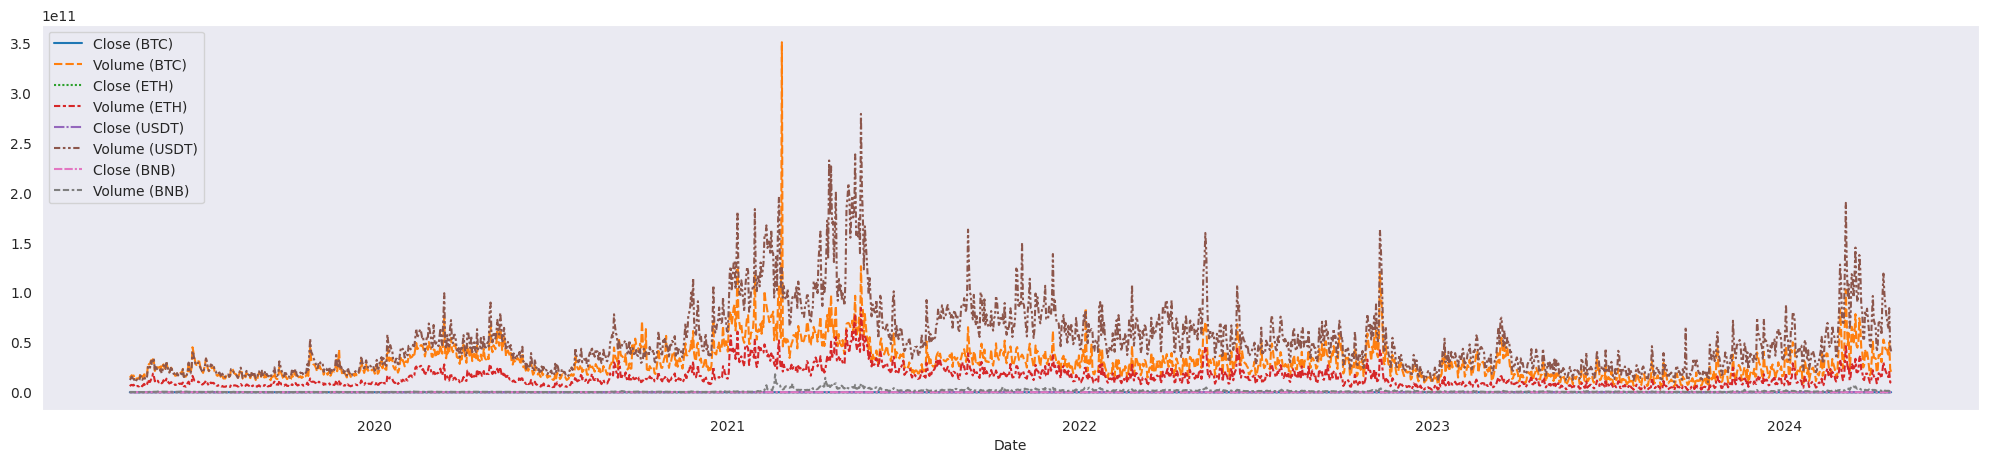

In [16]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

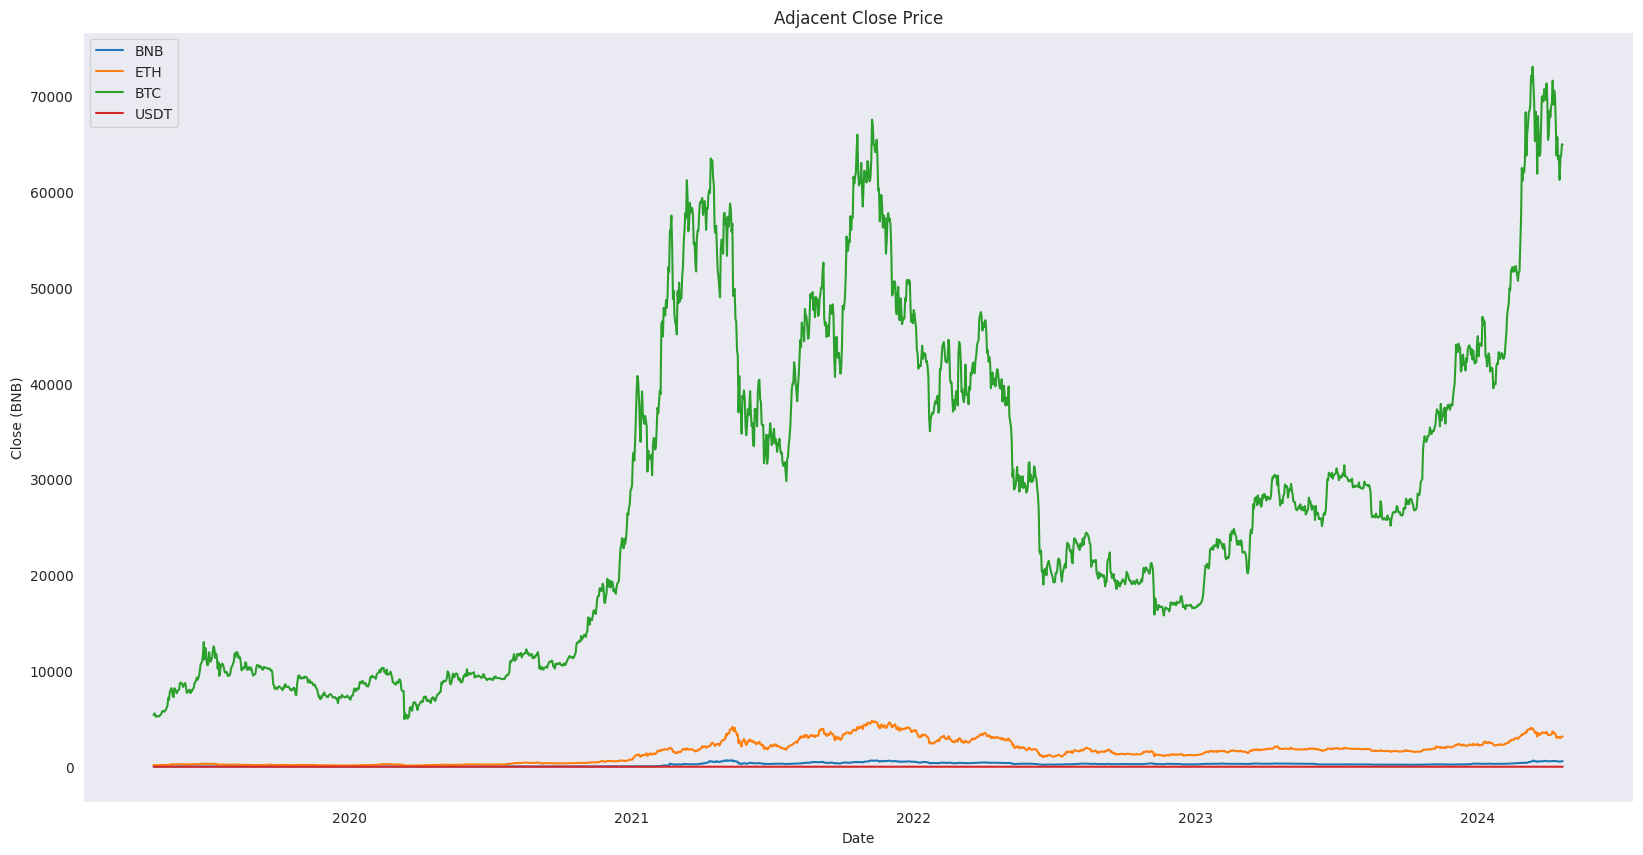

In [17]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

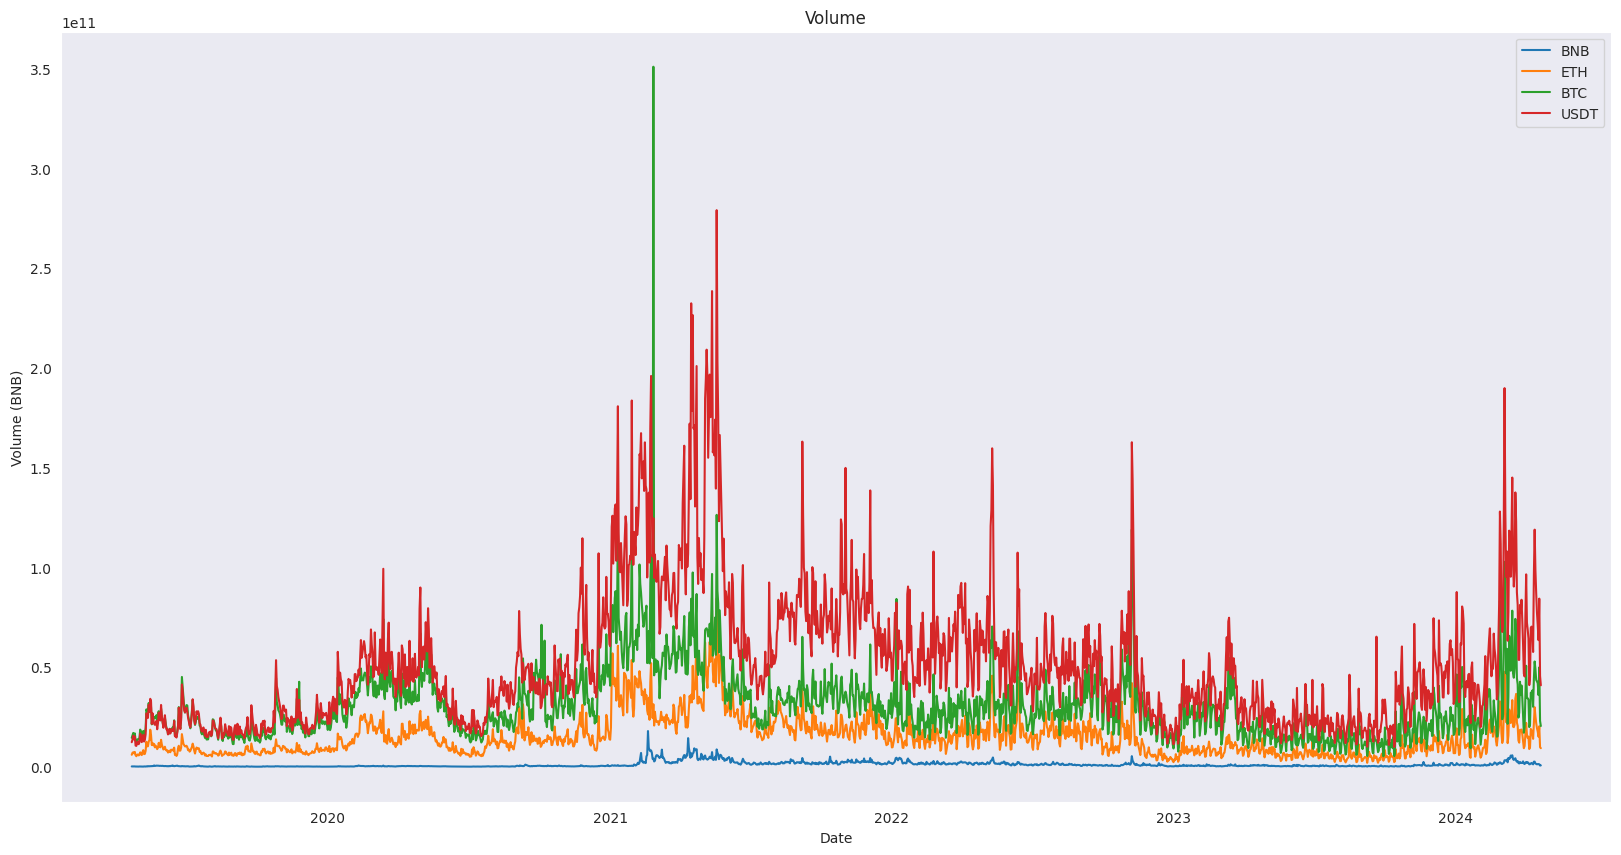

In [18]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [19]:
data_btc = data.loc[:,'Close (BTC)'].values
data_btc

array([ 5399.36523438,  5572.36230469,  5464.86669922, ...,
       63843.5703125 , 64994.44140625, 64926.64453125])

In [20]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

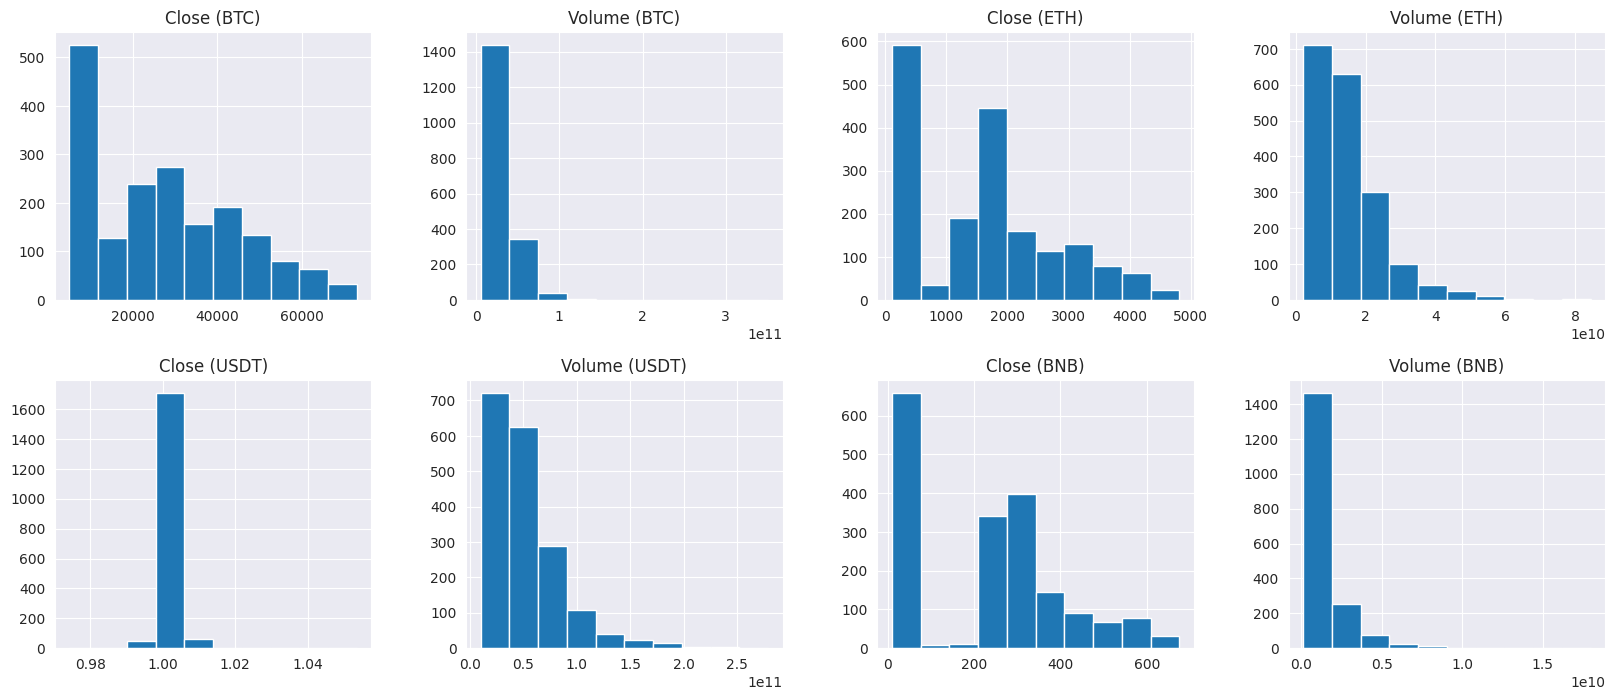

In [21]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

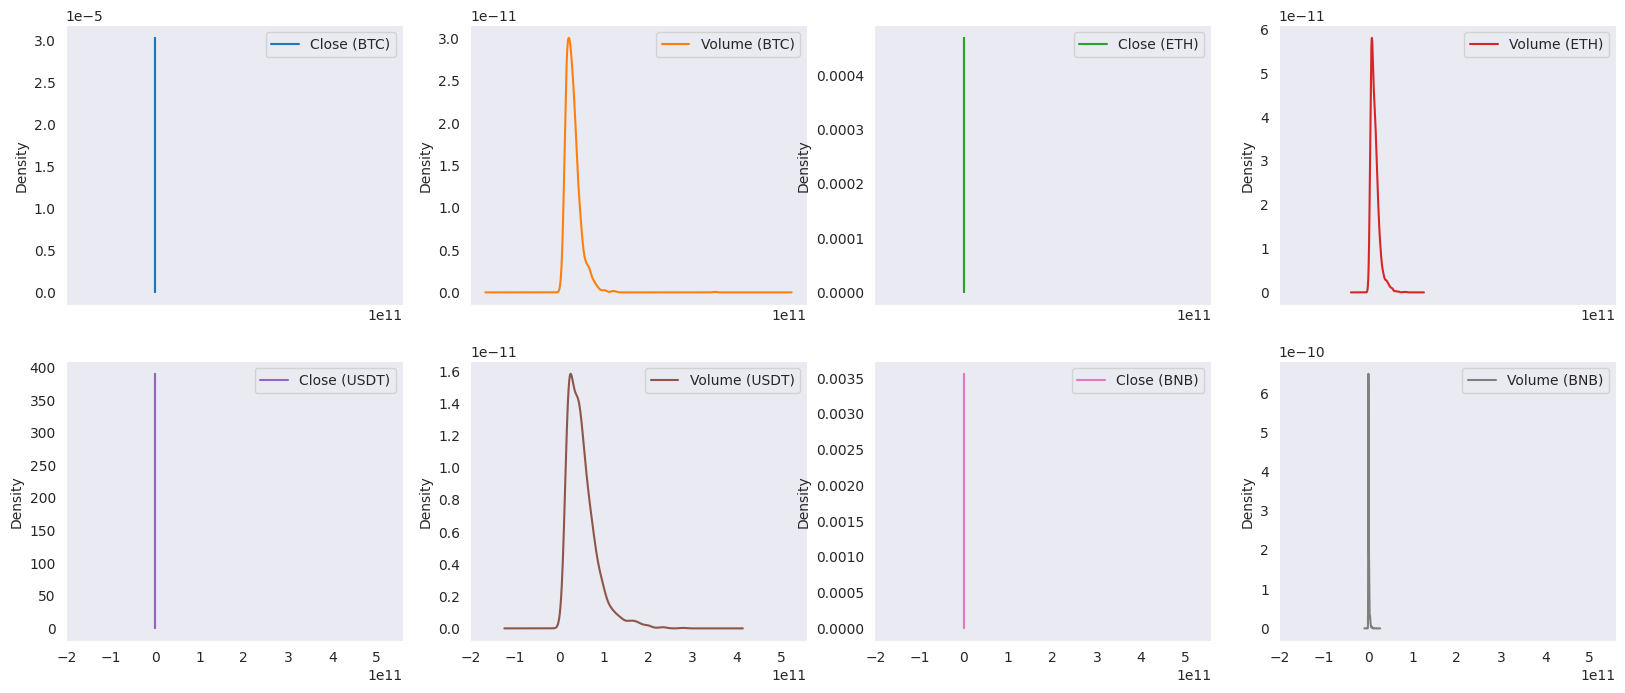

In [22]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

In [23]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.310256,0.915287,0.430799,-0.207702,0.594257,0.857658,0.649829
Volume (BTC),0.310256,1.000000,0.155583,0.810509,-0.038148,0.827085,0.132361,0.536049
Close (ETH),0.915287,0.155583,1.000000,0.335987,-0.232343,0.474856,0.948381,0.552516
Volume (ETH),0.430799,0.810509,0.335987,1.000000,-0.061071,0.922002,0.287694,0.649494
Close (USDT),-0.207702,-0.038148,-0.232343,-0.061071,1.000000,-0.088984,-0.242124,-0.113300
Volume (USDT),0.594257,0.827085,0.474856,0.922002,-0.088984,1.000000,0.435464,0.748953
Close (BNB),0.857658,0.132361,0.948381,0.287694,-0.242124,0.435464,1.000000,0.593796
Volume (BNB),0.649829,0.536049,0.552516,0.649494,-0.113300,0.748953,0.593796,1.000000


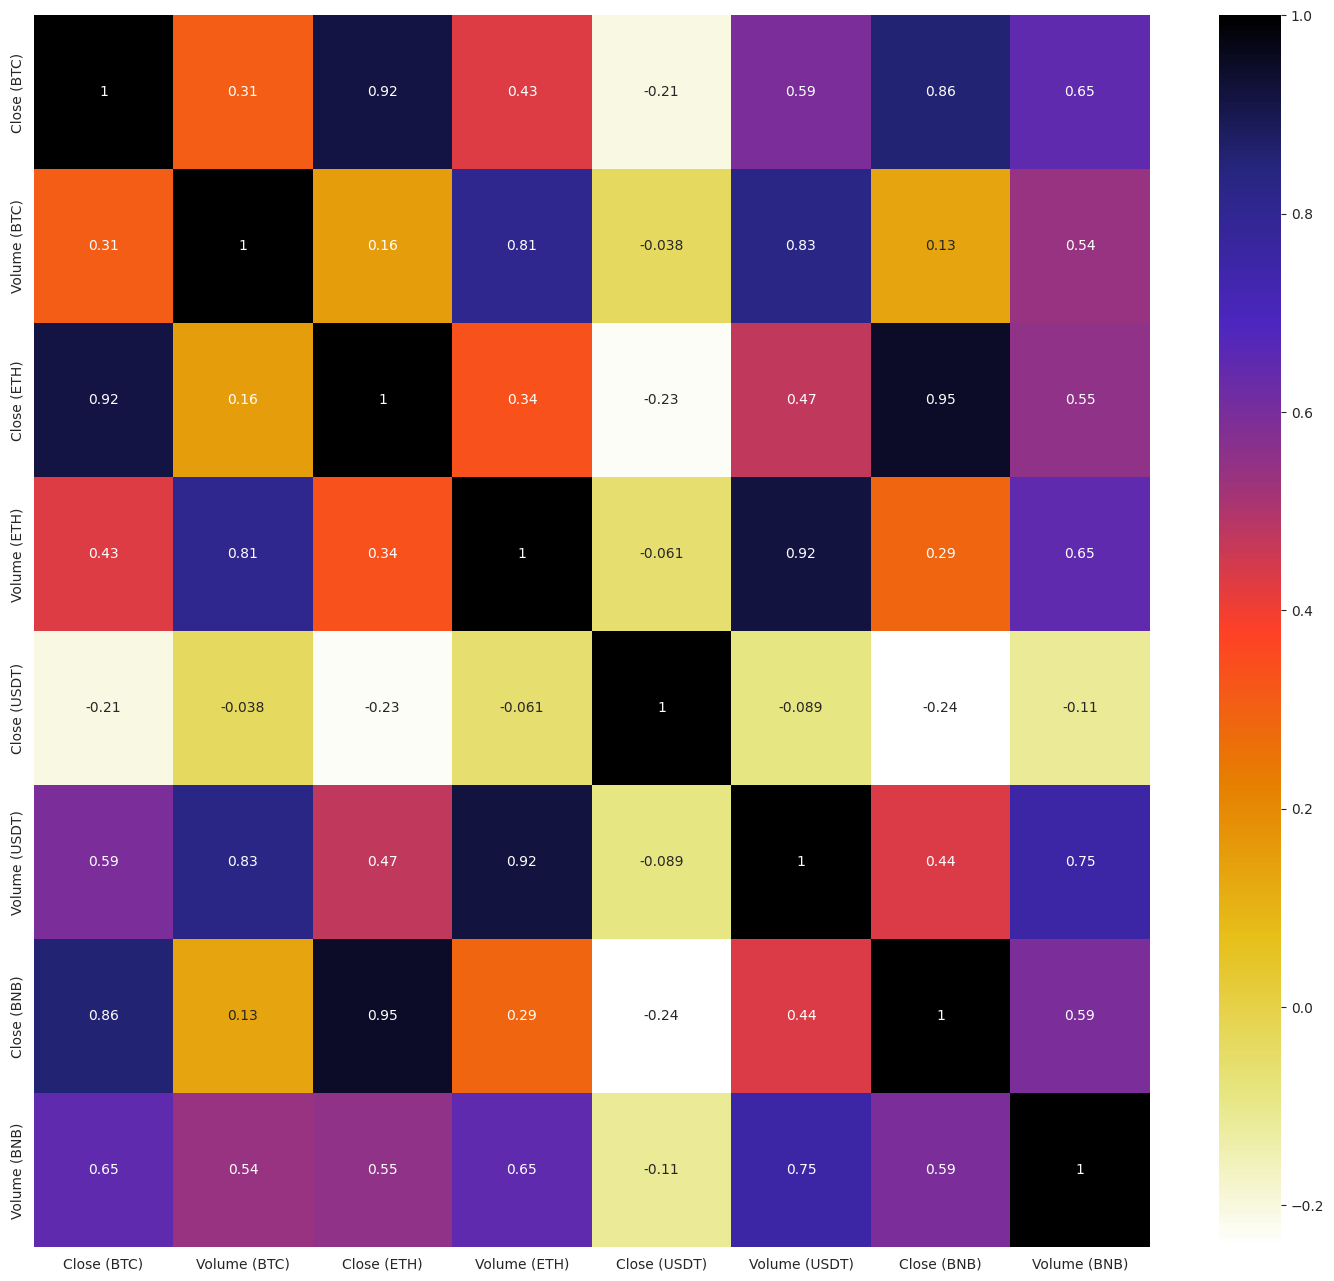

In [24]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

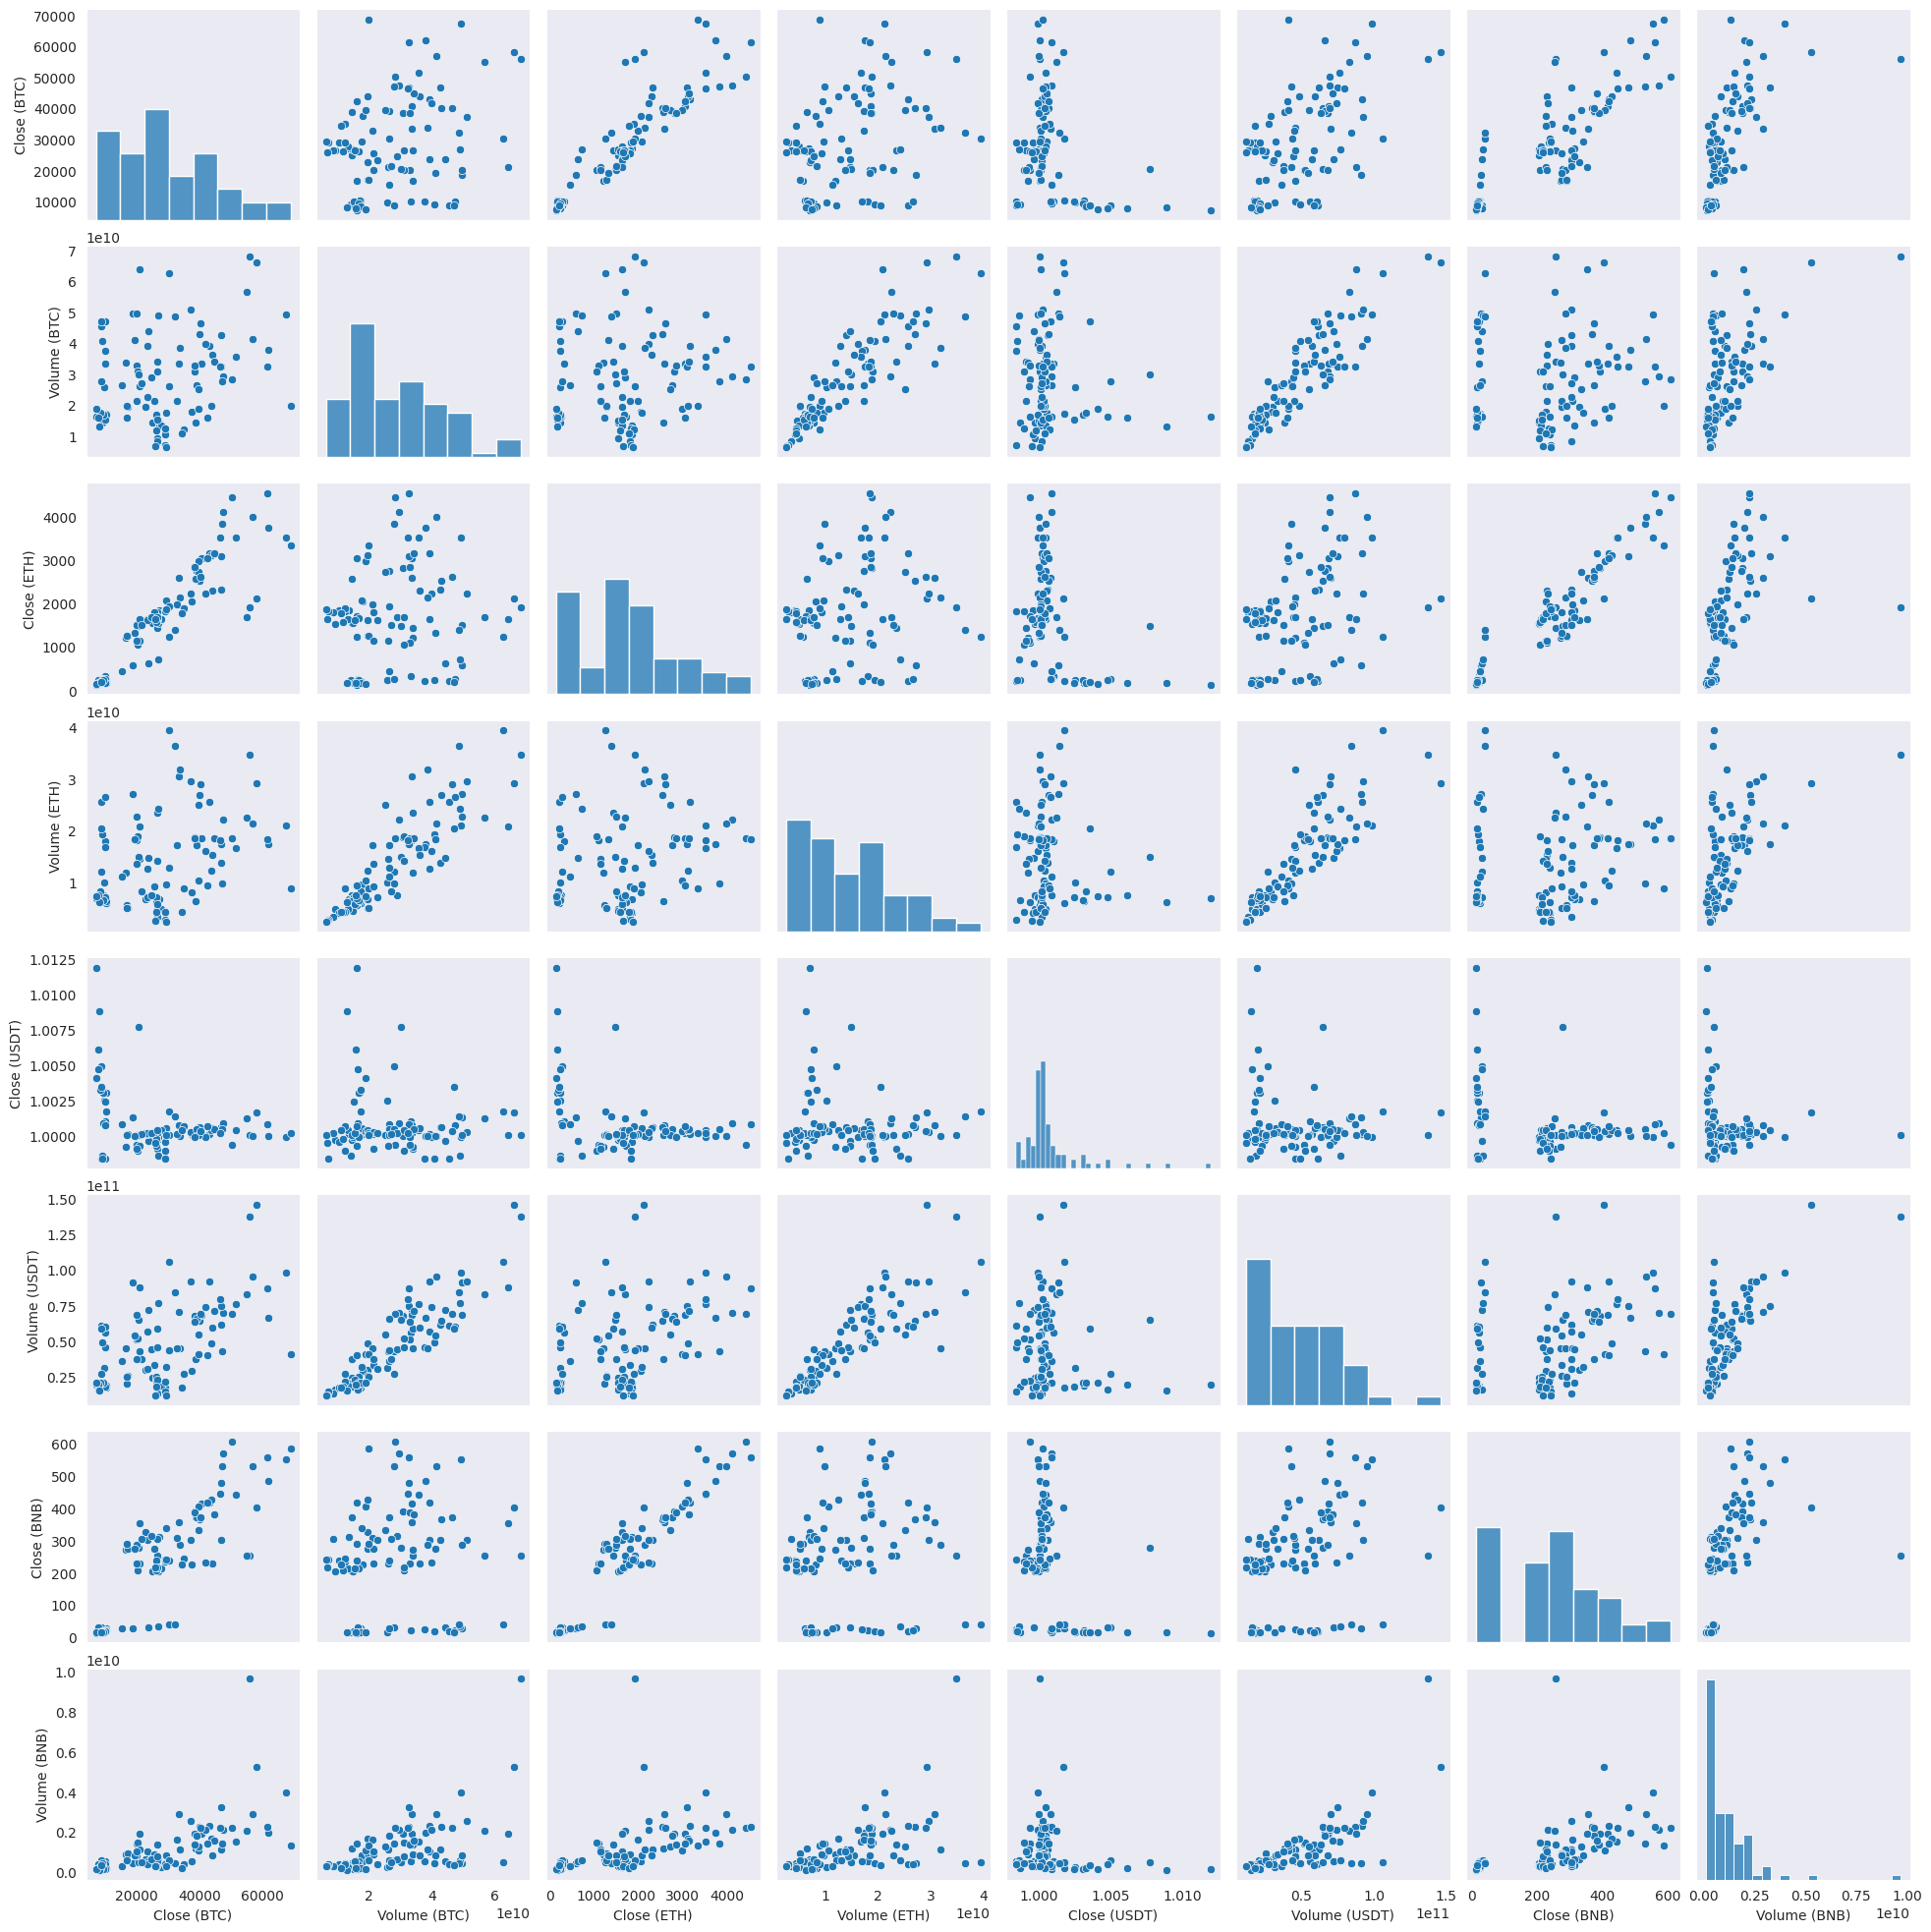

In [25]:
sns.pairplot(data.sample(n=100));

In [26]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [27]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2019-04-22 00:00:00+00:00,14601631648,171.874664,6094878077,1.006089,12392918470,23.908110,254544860
2019-04-23 00:00:00+00:00,15867308108,171.447800,7097827092,1.008323,13668552021,22.876261,264898474
2019-04-24 00:00:00+00:00,17048033399,165.826096,7351304156,1.005564,15689022306,23.129068,259839247
2019-04-25 00:00:00+00:00,15330283408,154.459396,6820332362,0.992808,13786916955,22.243107,244068802
2019-04-26 00:00:00+00:00,16812108040,156.347092,7505283355,0.991103,15229200868,22.869429,253113255


In [28]:
Y.head()

Date
2019-04-22 00:00:00+00:00    5399.365234
2019-04-23 00:00:00+00:00    5572.362305
2019-04-24 00:00:00+00:00    5464.866699
2019-04-25 00:00:00+00:00    5210.515625
2019-04-26 00:00:00+00:00    5279.348145
Name: Close (BTC), dtype: float64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [30]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

In [34]:
print("-"*30)
print("random forest: ", r2rf)
print("-"*30)

------------------------------
random forest:  0.9057601178084687
------------------------------


In [35]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42)

In [41]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 170,
 'bootstrap': True}

In [42]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9081281261794696
------------------------------


In [43]:
original

Close (BTC)      6.632288e+04
Volume (BTC)     2.631648e+10
Close (ETH)      3.201288e+03
Volume (ETH)     1.126972e+10
Close (USDT)     1.000564e+00
Volume (USDT)    4.949772e+10
Close (BNB)      5.977083e+02
Volume (BNB)     1.255565e+09
Name: 2024-04-22 00:00:00+00:00, dtype: float64